In [43]:
# Import libriaries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import operator

In [62]:
class Tree:
    def __init__(self, root=None, left=None, right=None):        
        self.root = root
        self.left = left
        self.right = right

In [74]:
def pre_processing(img):
    h,w = img.shape
    
    code = {}
    code['width'] = w
    code['height'] = h
    code['intensity_p'] = [(i,0) for i in range(256)]
    
    return code

def generate_tree(intensities):
    if len(intensities) == 1:
        return Tree(root=intensities[:1])
    else:
        return Tree(left=generate_tree(intensities[:1]), right=generate_tree(intensities[1:]))
        

def huffman(img):
    code = pre_processing(img)
    
    for row in range(code['height']):
        for col in range(code['width']):
            intensity = img[row,col]
            code['intensity_p'][intensity] = ( intensity, code['intensity_p'][intensity][1]+1 )
    code['intensity_p'].sort(key = operator.itemgetter(1), reverse=True)
    max_index = 0
    
    for (_,j) in code['intensity_p']:
        if j == 0:
            break
        max_index += 1
    
    code['intensity_p'] = code['intensity_p'][:max_index]
    code['tree'] = generate_tree(code['intensity_p'])
    
    return code

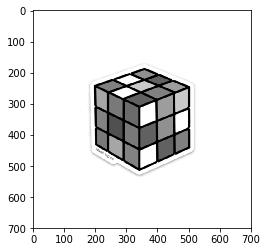

[(255, 406338), (0, 14808), (98, 7313), (121, 5971), (128, 4482), (130, 3699), (157, 3592), (166, 3591), (144, 3302), (201, 3234), (247, 2747), (107, 2415), (80, 2138), (244, 2111), (5, 1230), (236, 1185), (231, 930), (239, 902), (220, 742), (228, 559), (195, 540), (223, 537), (11, 429), (211, 412), (199, 400), (7, 397), (188, 391), (74, 373), (215, 353), (9, 352), (92, 307), (27, 289), (204, 268), (52, 267), (96, 256), (93, 253), (179, 250), (55, 236), (31, 235), (99, 235), (25, 231), (34, 230), (207, 230), (149, 220), (13, 211), (67, 210), (17, 204), (19, 204), (72, 204), (155, 203), (16, 200), (60, 200), (65, 200), (113, 200), (88, 199), (172, 195), (116, 192), (83, 189), (108, 189), (124, 188), (18, 187), (132, 180), (139, 174), (44, 170), (49, 167), (23, 166), (39, 164), (163, 160), (146, 152), (69, 150), (79, 149), (8, 146), (63, 141), (105, 140), (81, 138), (22, 137), (15, 136), (196, 131), (43, 130), (118, 130), (58, 128), (71, 123), (102, 122), (28, 119), (84, 118), (21, 117),

In [79]:
rubiks = cv2.imread('images/rubiks.png', 0)
code = huffman(rubiks)

plt.imshow(rubiks, cmap='gray')
plt.show()
print(code['intensity_p'])